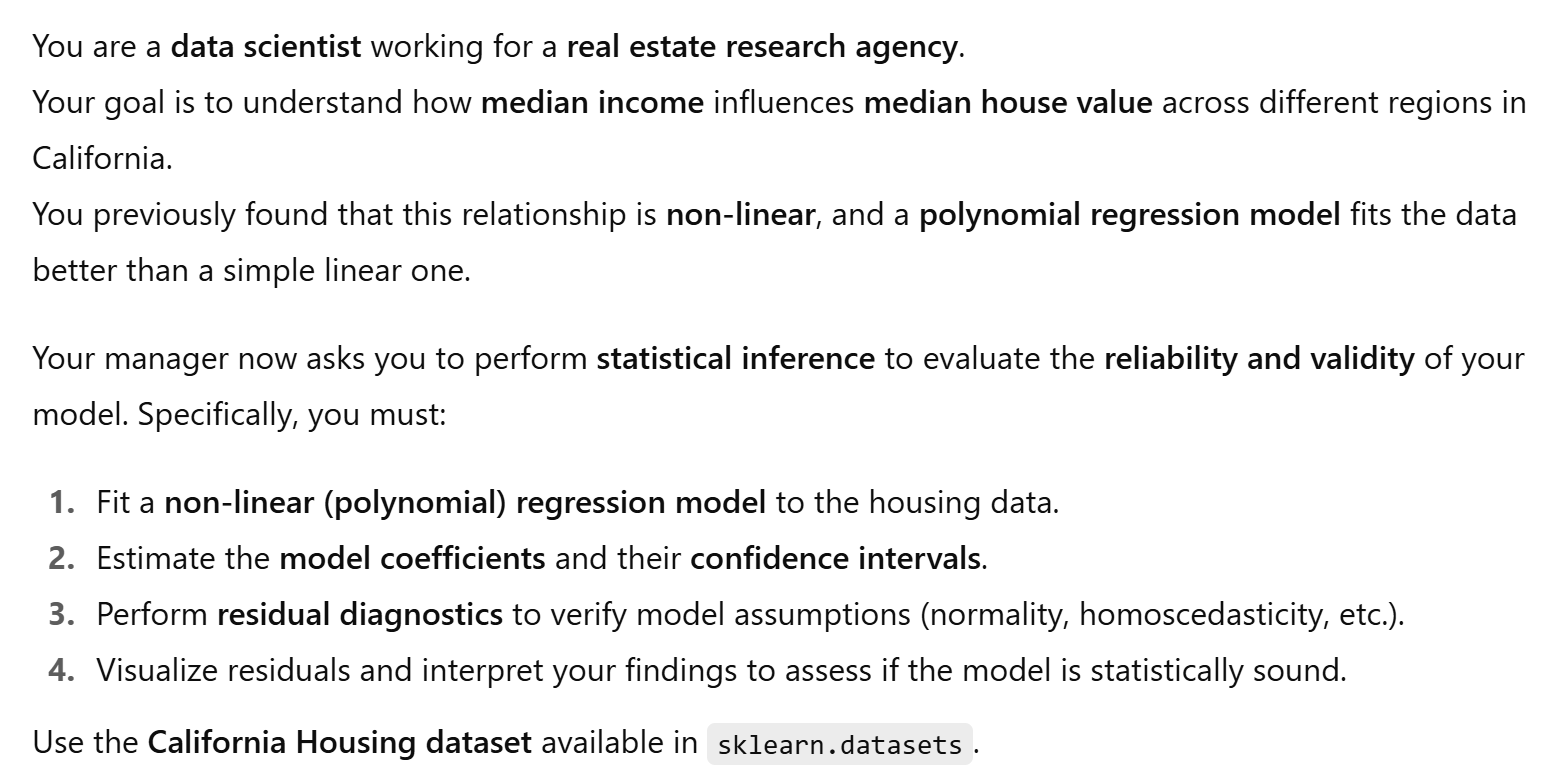

In [6]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from scipy import stats

In [7]:
# Step 1: Load the dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Select variables
X = df[['MedInc']]   # Median Income
y = df['MedHouseVal']  # Median House Value

In [8]:

# Step 2: Create Polynomial Features (Non-linear relationship)
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly = sm.add_constant(X_poly)  # Add intercept manually for statsmodels

In [9]:
# Step 3: Fit the Non-Linear Regression Model using statsmodels
model = sm.OLS(y, X_poly).fit()

In [10]:

# Step 5: Confidence Intervals for coefficients
conf_int = model.conf_int(alpha=0.05)
conf_int.columns = ['Lower 95%', 'Upper 95%']
print("\nConfidence Intervals for Model Coefficients:")
print(conf_int)


Confidence Intervals for Model Coefficients:
       Lower 95%  Upper 95%
const   0.695909   0.846815
x1      0.097261   0.188504
x2      0.053395   0.069230
x3     -0.003944  -0.003174


In [11]:
# Step 6: Residual Diagnostics
residuals = model.resid
fitted_vals = model.fittedvalues

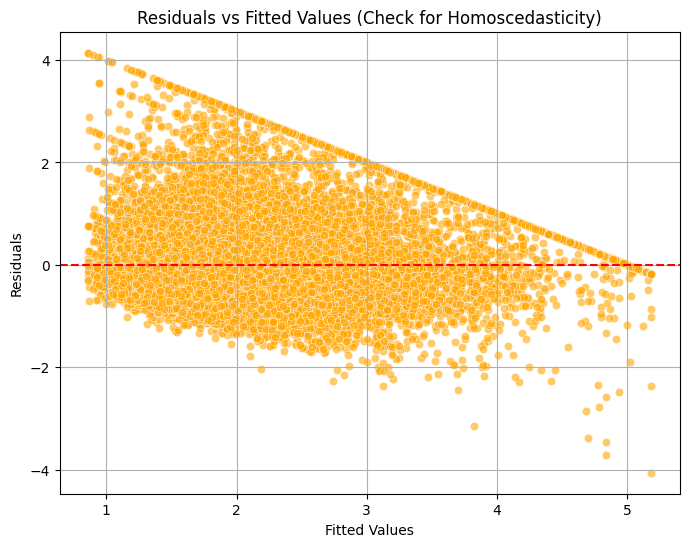

In [12]:
# a) Residual Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=fitted_vals, y=residuals, color='orange', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values (Check for Homoscedasticity)")
plt.grid(True)
plt.show()

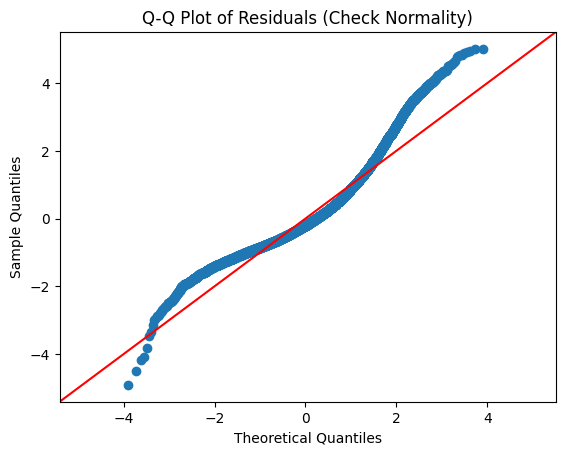

In [13]:
# b) Q-Q Plot for normality of residuals
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals (Check Normality)")
plt.show()

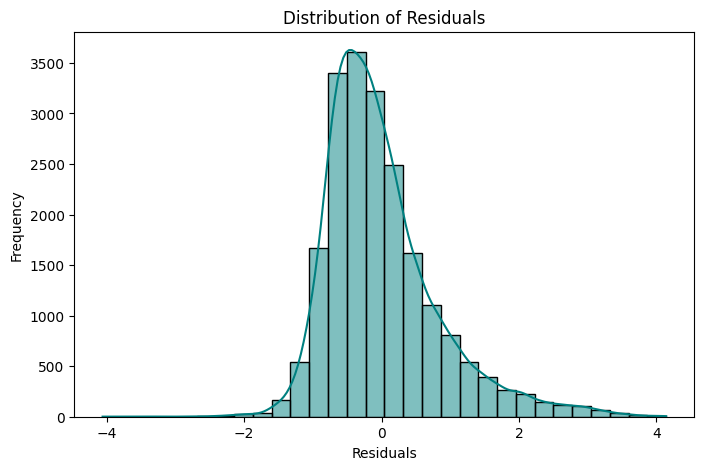

In [14]:
# c) Histogram of residuals
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, color='teal', bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [15]:
# Step 7: Shapiro-Wilk Test for Normality
shapiro_test = stats.shapiro(residuals)
print("\nShapiro-Wilk Test for Normality:")
print(f"Statistic = {shapiro_test.statistic:.4f}, p-value = {shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue > 0.05:
    print("Residuals appear to be normally distributed.")
else:
    print("Residuals deviate from normality.")


Shapiro-Wilk Test for Normality:
Statistic = 0.9185, p-value = 0.0000
Residuals deviate from normality.


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20640.
  res = hypotest_fun_out(*samples, **kwds)


In [16]:
# Step 8: Interpretation Summary
print("\nInterpretation Summary:")
print("- If residuals are randomly scattered around zero → no clear pattern → good model fit.")
print("- If residuals follow the 45° line in Q-Q plot → residuals are approximately normal.")
print("- Confidence intervals that exclude zero indicate statistically significant predictors.")



Interpretation Summary:
- If residuals are randomly scattered around zero → no clear pattern → good model fit.
- If residuals follow the 45° line in Q-Q plot → residuals are approximately normal.
- Confidence intervals that exclude zero indicate statistically significant predictors.


| Concept                   | Explanation                                                                              |
| ------------------------- | ---------------------------------------------------------------------------------------- |
| **Non-linear Regression** | Captures curved relationships using polynomial or other transformations.                 |
| **Confidence Intervals**  | Show the range within which the true coefficient values likely fall (usually 95%).       |
| **Residual Diagnostics**  | Used to check model assumptions — linearity, normality, and equal variance of residuals. |
| **Shapiro-Wilk Test**     | Tests whether residuals follow a normal distribution (p > 0.05 → approximately normal).  |


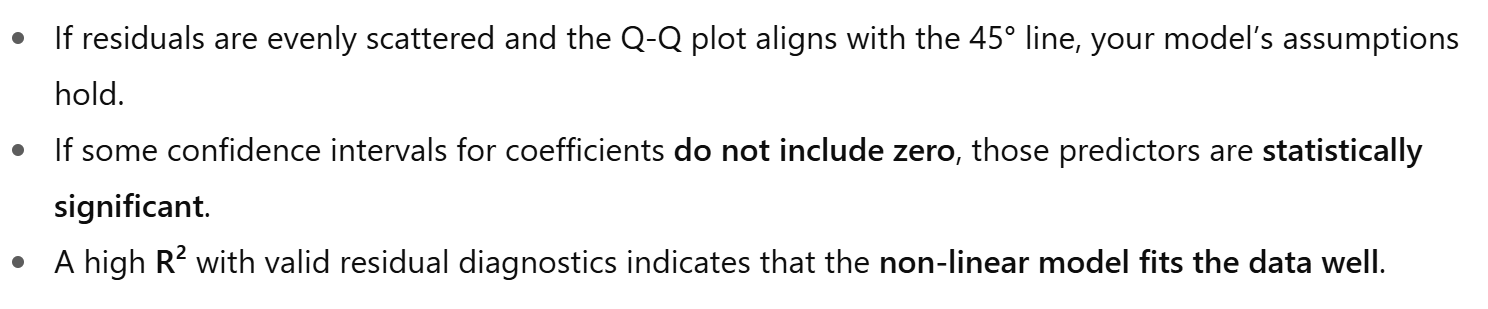